In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, pearsonr, spearmanr


In [ ]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 1. Multicolinearity

In [ ]:
# Scatter plot for sepal width (cm) & sepal length (cm
scatt = df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)")
scatt.set(xlabel="sepal length (cm)", ylabel="sepal width (cm)")
plt.show()

### Correlation matrix

In [ ]:
correlation_matrix=df.corr()
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.247102,0.807537,0.899178
sepal width (cm),0.247102,1.000000,-0.226572,0.201126
petal length (cm),0.807537,-0.226572,1.000000,0.769205
petal width (cm),0.899178,0.201126,0.769205,1.000000


### Heatmap


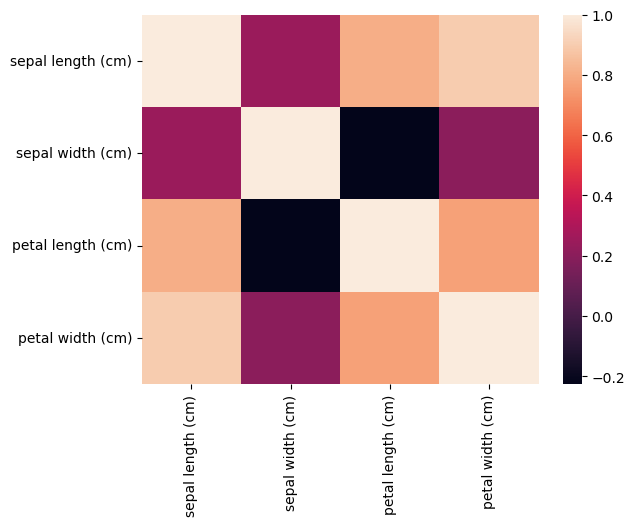

In [ ]:
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
correlation
# Plot heatmap of `correlation`
sns.heatmap(correlation);

# 2. Sensitivity to Outliers

## scatter before adding outlier

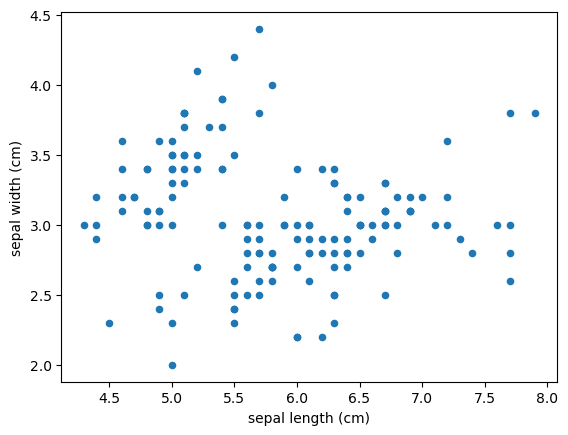

In [ ]:
# Scatter plot for sepal width (cm) & sepal length (cm
scatt = df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)")
scatt.set(xlabel="sepal length (cm)", ylabel="sepal width (cm)")
plt.show()

## Correlation before adding outlier

In [ ]:
# Pearson, Spearman and Kendal tau correlation coefficients
corr_pearson = pearsonr(df["sepal length (cm)"], df["sepal width (cm)"])
corr_spearman = spearmanr(df["sepal length (cm)"], df["sepal width (cm)"])
corr_kendall = kendalltau(df["sepal length (cm)"], df["sepal width (cm)"])
print(
    "Correlation Pearson     : ",
    corr_pearson[0].round(4),
    "\nCorrelation Spearman    : ",
    corr_spearman.correlation.round(4),
    "\nCorrelation kendalltau  : ",
    corr_kendall.correlation.round(4),
)

Correlation Pearson     :  -0.1176 
Correlation Spearman    :  -0.1668 
Correlation kendalltau  :  -0.077


## adding outlier


In [ ]:
df.loc[len(df.index)] = [15,6, 10,14] 


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8
150,15.0,6.0,10.0,14.0


## Plot influential point

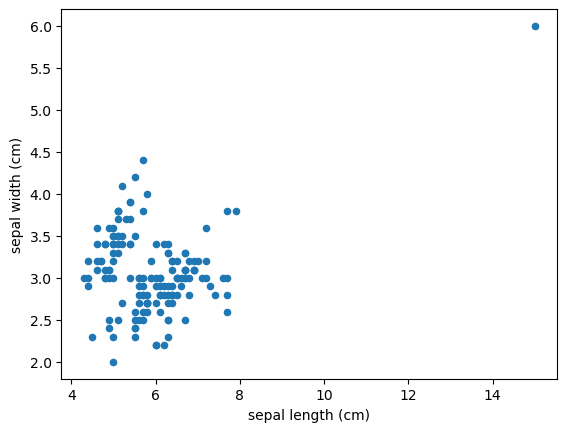

In [ ]:
# Scatter plot for sepal width (cm) & sepal length (cm
scatt = df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)")
scatt.set(xlabel="sepal length (cm)", ylabel="sepal width (cm)")
plt.show()

## Correlation Coefficient after adding outlier

In [ ]:
# Pearson, Spearman and Kendal tau correlation coefficients
corr_pearson = pearsonr(df["sepal length (cm)"], df["sepal width (cm)"])
corr_spearman = spearmanr(df["sepal length (cm)"], df["sepal width (cm)"])
corr_kendall = kendalltau(df["sepal length (cm)"], df["sepal width (cm)"])
print(
    "Correlation Pearson     : ",
    corr_pearson[0].round(4),
    "\nCorrelation Spearman    : ",
    corr_spearman.correlation.round(4),
    "\nCorrelation kendalltau  : ",
    corr_kendall.correlation.round(4),
)

Correlation Pearson     :  0.2471 
Correlation Spearman    :  -0.1436 
Correlation kendalltau  :  -0.0619


## 3. Skewness

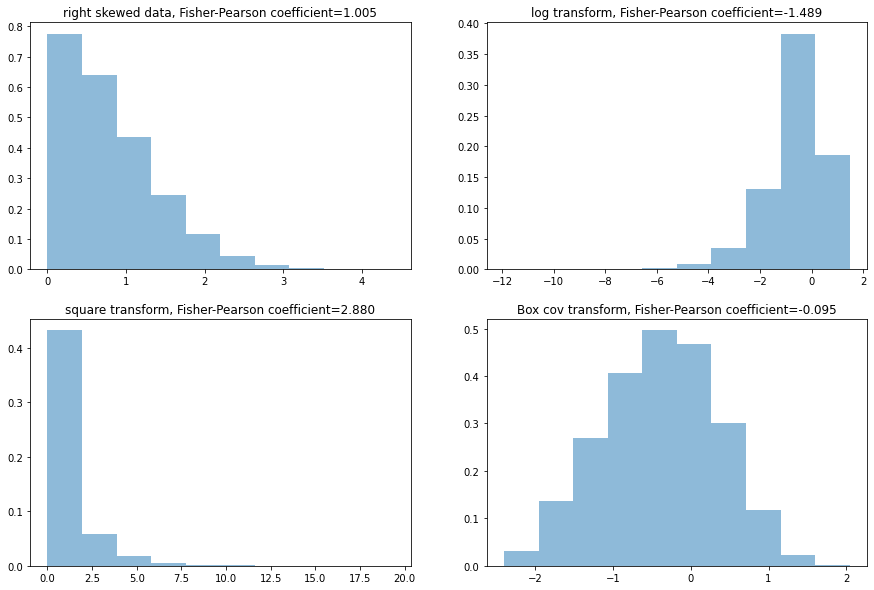

In [ ]:
def skewness_simulation():
  import matplotlib.pyplot as plt
  import numpy as np
  from scipy import stats
  from scipy.stats import skewnorm, skew
  
  
  def gen_right_skewed_data():
    fig, ax = plt.subplots(2, 2)
    fig.set_size_inches((15, 10))
  
    data= np.abs(skewnorm.rvs(20, size=100000))
    data_log = np.log(data)
    data_square = np.square(data)
    data_bc, _ = stats.boxcox(data)

    data_skewness = skew(data)
    data_log_skewness = skew(data_log)
    data_square_skewness = skew(data_square)
    data_bc_skewness = skew(data_bc)

    ax[0][0].hist(data, density=True, histtype='stepfilled', alpha=0.5)
    ax[0][0].legend(loc='best', frameon=False)
    ax[0][0].set_title(f'right skewed data, Fisher-Pearson coefficient={data_skewness:.3f}')

    ax[0][1].hist(data_log, density=True, histtype='stepfilled', alpha=0.5)
    ax[0][1].legend(loc='best', frameon=False)
    ax[0][1].set_title(f'log transform, Fisher-Pearson coefficient={data_log_skewness:.3f}')

    ax[1][0].hist(data_square, density=True, histtype='stepfilled', alpha=0.5)
    ax[1][0].legend(loc='best', frameon=False)
    ax[1][0].set_title(f'square transform, Fisher-Pearson coefficient={data_square_skewness:.3f}')

    ax[1][1].hist(data_bc, density=True, histtype='stepfilled', alpha=0.5)
    ax[1][1].legend(loc='best', frameon=False)
    ax[1][1].set_title(f'Box cov transform, Fisher-Pearson coefficient={data_bc_skewness:.3f}')

    plt.savefig('skewness.png') 
    plt.show()

  gen_right_skewed_data()

skewness_simulation()